## Team 2: Spacial Inequality Dynamic 
##  Comparing US and UK
##### UK data found on the Database of Global Administrative Areas (GADM). UK is spilt into Nomencluature of territorial units for statistics (NUTS); a hierarchical systems for dividing up economic territory of the EU and the UK for purposes of: collection, development and EU region statistics as well as socio-economic analyses of the regions. Where NUTS 1 contains major socio-economic regions, NUTS 2 basic regions for the application of regional policies and NUTS 3 focuses on small regions for specific diagnosis. NUTS 1-3 are comparable to 1-US, 2-States and 3-cities. 

In [1]:
# Preliminary Reading of the File

In [2]:
import geopandas as gpd

In [3]:
import geopandas as gpd
newgdf2 = gpd.read_file('NUTS_Level_2_(January_2018)_Boundaries.shp')
newgdf2.shape


(41, 10)

<AxesSubplot:>

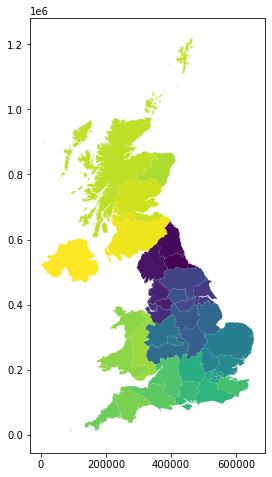

In [4]:
newgdf2.plot(cmap='viridis', figsize=(8,8))

In [5]:
newgdf2.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,"MULTIPOLYGON (((416954.896 558226.798, 416959...."
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,"POLYGON ((391363.101 420849.902, 391421.401 42..."
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,"MULTIPOLYGON (((370171.702 482434.604, 370185...."


In [6]:
newgdf2['nuts218nm'].nunique()

41

## Data Team
### Data found on Office for National Statistics *Regional gross disposable household income: all NUTS level regions*
#### The Data We Want to Specifically Use is Table 2= NUT 2 GHDI per head

In [7]:
import pandas as pd
income= pd.read_excel(open('regionalgrossdisposablehouseholdincomeallnutslevelregions.xls','rb'), sheet_name= 'Table 2', header=[1])
income.head()

,NUTS level,NUTS code,Region name,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20181
0,UK,UK,United Kingdom,10799.0,11050.0,11551.0,12271.0,12679.0,13044.0,13383.0,...,16433.0,16603.0,16842.0,17486.0,18091.0,18651.0,19533.0,19719.0,20172.0,21109.0
1,Other,UK0,England,11058.0,11328.0,11850.0,12576.0,12985.0,13331.0,13663.0,...,16766.0,16923.0,17141.0,17822.0,18456.0,19043.0,20000.0,20207.0,20658.0,21609.0
2,NUTS1,UKC,North East,9295.0,9372.0,9726.0,10333.0,10736.0,10973.0,11267.0,...,13679.0,13921.0,14121.0,14710.0,14984.0,15347.0,15858.0,15971.0,16364.0,16995.0
3,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,13366.0,13632.0,13827.0,14382.0,14602.0,15073.0,15519.0,15591.0,16020.0,16585.0
4,NUTS3,UKC11,Hartlepool and Stockton-on-Tees,9324.0,9255.0,9741.0,10229.0,10604.0,10972.0,11247.0,...,13768.0,14026.0,14392.0,14832.0,14893.0,15387.0,15745.0,15814.0,16465.0,17243.0


In [8]:
income.rename(columns={'Region name':'region'},inplace=True)

In [9]:
print(income.groupby('NUTS level').region.nunique())

NUTS level
1 Provisional.       0
NUTS1               12
NUTS2               41
NUTS3              179
Other                1
UK                   1
Name: region, dtype: int64


In [10]:
income.to_csv('uk2', index=False)

In [11]:
uk2=pd.read_csv('uk2')

In [12]:
uk2.head()

,NUTS level,NUTS code,region,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20181
0,UK,UK,United Kingdom,10799.0,11050.0,11551.0,12271.0,12679.0,13044.0,13383.0,...,16433.0,16603.0,16842.0,17486.0,18091.0,18651.0,19533.0,19719.0,20172.0,21109.0
1,Other,UK0,England,11058.0,11328.0,11850.0,12576.0,12985.0,13331.0,13663.0,...,16766.0,16923.0,17141.0,17822.0,18456.0,19043.0,20000.0,20207.0,20658.0,21609.0
2,NUTS1,UKC,North East,9295.0,9372.0,9726.0,10333.0,10736.0,10973.0,11267.0,...,13679.0,13921.0,14121.0,14710.0,14984.0,15347.0,15858.0,15971.0,16364.0,16995.0
3,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,13366.0,13632.0,13827.0,14382.0,14602.0,15073.0,15519.0,15591.0,16020.0,16585.0
4,NUTS3,UKC11,Hartlepool and Stockton-on-Tees,9324.0,9255.0,9741.0,10229.0,10604.0,10972.0,11247.0,...,13768.0,14026.0,14392.0,14832.0,14893.0,15387.0,15745.0,15814.0,16465.0,17243.0


In [13]:
merge=pd.merge(uk2,newgdf2,left_on='NUTS code',right_on='nuts218cd')

In [14]:
merge.head()

,NUTS level,NUTS code,region,1997,1998,1999,2000,2001,2002,2003,...,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,NUTS2,UKC1,Tees Valley and Durham,9240.0,9234.0,9642.0,10222.0,10646.0,10851.0,11052.0,...,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,"MULTIPOLYGON (((416954.896 558226.798, 416959...."
1,NUTS2,UKC2,Northumberland and Tyne and Wear,9339.0,9485.0,9795.0,10424.0,10810.0,11074.0,11444.0,...,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
2,NUTS2,UKD1,Cumbria,9992.0,10408.0,10725.0,11186.0,11906.0,12112.0,12651.0,...,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
3,NUTS2,UKD3,Greater Manchester,9620.0,9765.0,10399.0,10979.0,11247.0,11556.0,11782.0,...,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,"POLYGON ((391363.101 420849.902, 391421.401 42..."
4,NUTS2,UKD4,Lancashire,9543.0,9682.0,10058.0,10693.0,11048.0,11308.0,11586.0,...,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,"MULTIPOLYGON (((370171.702 482434.604, 370185...."


In [15]:
merge['region'].nunique()

41

<AxesSubplot:>

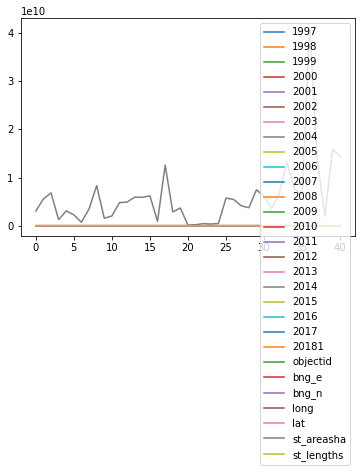

In [16]:
merge.plot()

In [17]:
type(merge)

pandas.core.frame.DataFrame

In [18]:
from geopandas import GeoDataFrame

In [19]:
merge2=GeoDataFrame(merge)

In [20]:
type(merge2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

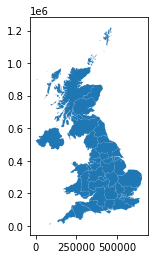

In [21]:
merge2.plot()

In [22]:
merge2['1997']

0      9240.0
1      9339.0
2      9992.0
3      9620.0
4      9543.0
5     11370.0
6      9350.0
7      9238.0
8     11379.0
9      8983.0
10     9665.0
11     9388.0
12    10395.0
13    10059.0
14    11207.0
15    10016.0
16     9160.0
17    10424.0
18    12437.0
19    11620.0
20    20600.0
21    10759.0
22    11304.0
23    12965.0
24    13183.0
25    13669.0
26    13991.0
27    11747.0
28    11580.0
29    11574.0
30    11353.0
31     9895.0
32    10576.0
33     9207.0
34     9845.0
35    11099.0
36     8921.0
37    10210.0
38     9398.0
39     9302.0
40     8717.0
Name: 1997, dtype: float64

<AxesSubplot:>

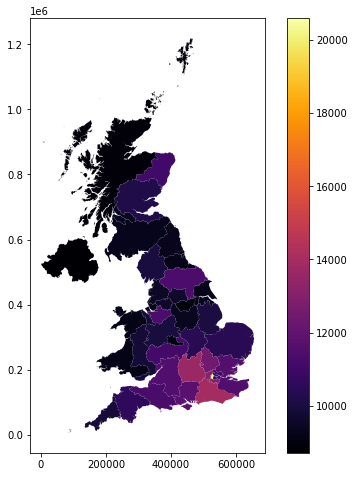

In [23]:
merge2.plot(column='1997',cmap='inferno', figsize=(8,8),legend=True)

In [24]:
merge2.to_parquet('uk.parquet')


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


## Analytics Team

### Adding in GINI Index

In [25]:
%matplotlib inline

import seaborn
import pandas
import geopandas
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

In [26]:
from pysal.explore import inequality

In [27]:
n = len(merge2)
share_of_population = numpy.arange(1, n+1) / n

In [28]:
years = numpy.arange(1997, 2018).astype(str)

### Calculating the Lorenz Curve for 1997 first to demonstrate the logic of calculating first

In [29]:
incomes = merge2['1997'].sort_values()

In [30]:
shares = incomes / incomes.sum()

In [31]:
cumulative_share = shares.cumsum()

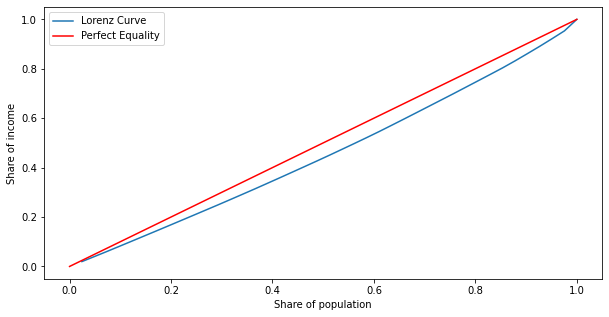

In [32]:
f, ax = plt.subplots()
ax.plot(share_of_population, cumulative_share, label='Lorenz Curve')
ax.plot((0,1), (0,1), color='r', label='Perfect Equality')
ax.set_xlabel('Share of population')
ax.set_ylabel('Share of income')
ax.legend()
plt.show()

### Alternative Way of Calculating Lorenze Curves for all Years as a single function

In [33]:
def lorenz(y):
    y = numpy.asarray(y)
    incomes = numpy.sort(y)
    income_shares = (incomes / incomes.sum()).cumsum()
    N = y.shape[0]
    pop_shares = numpy.arange(1, N+1)/N
    return pop_shares, income_shares

### Calculating Lorenz Curves for all Years in Our Datasets Using a List for all Years 

In [34]:
lorenz_curves = merge2[years].apply(lorenz, axis=0)

In [35]:
lorenz_curves.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....",...,"[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0....","[0.024390243902439025, 0.04878048780487805, 0...."
1,"[0.019707451618737565, 0.03987610779526135, 0....","[0.019348486888723575, 0.03947621118437464, 0....","[0.019276450338528765, 0.03904407437047199, 0....","[0.019261701303936556, 0.0390282938666688, 0.0...","[0.019067587996455235, 0.03912176342367076, 0....","[0.019626752120556024, 0.03998521567663608, 0....","[0.019899352878449246, 0.040079904173422734, 0...","[0.0201288159892056, 0.040296283802777305, 0.0...","[0.019495395419898875, 0.03956309245456617, 0....","[0.01916296133055055, 0.03900973541955639, 0.0...",...,"[0.018601922753786696, 0.03788797138673516, 0....","[0.0187624897685291, 0.038257958425201494, 0.0...","[0.018916922609802524, 0.03840022888907055, 0....","[0.018900291714698134, 0.03846546843451243, 0....","[0.01869636940820938, 0.03814824569915577, 0.0...","[0.01856805517211803, 0.037861142307290256, 0....","[0.018682542491075052, 0.0380936520987937, 0.0...","[0.01854929742417937, 0.037666735607723725, 0....","[0.01867732387345433, 0.03764408442150391, 0.0...","[0.01860944604833616, 0.037639964087883046, 0...."


### Plotting All Lorenz Curves on One Plot

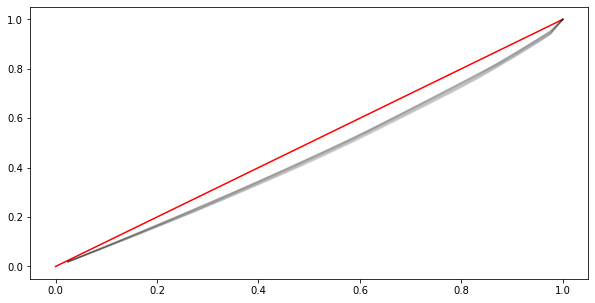

In [36]:
f, ax = plt.subplots()
ax.plot((0,1),(0,1), color='r')
for year in lorenz_curves.columns:
    year_pop_shares, year_inc_shares = lorenz_curves[year].values
    ax.plot(year_pop_shares, year_inc_shares, color='k', alpha=.05)

### Calculating GINI Index for 1997 then for all Years

In [37]:
g97 = inequality.gini.Gini(merge2['1997'].values)

In [38]:
g97.g

0.08792199886187685

In [39]:
def gini_by_col(column):
    return inequality.gini.Gini(column.values).g

In [40]:
inequalities = merge2[years].apply(gini_by_col, axis=0).to_frame('gini')

In [41]:
inequalities.head()

,gini
1997,0.087922
1998,0.091013
1999,0.091834
2000,0.094066
2001,0.092353


### Graphing All Gini Indexes on One Plot

<AxesSubplot:>

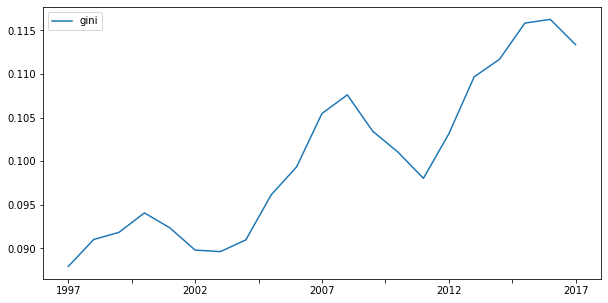

In [42]:
inequalities.plot()

In [43]:
from pysal.explore import inequality

## 20:20 Ratio
### Comparing the ratio 

In [44]:
top20, bottom20 = merge2['1997'].quantile([.8, .2])

In [45]:
top20/bottom20

1.2399614519755862

In [46]:
def ineq_20_20(values):
    top20, bottom20 = values.quantile([.8, .2])
    return top20 / bottom20


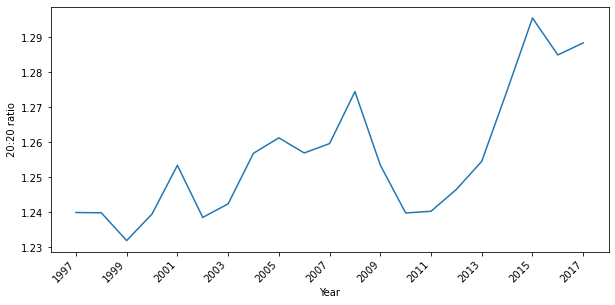

In [47]:
years = numpy.arange(1997, 2018).astype(str)
ratio_2020 = merge2[years].apply(ineq_20_20, axis=0)
ax = plt.plot(years, ratio_2020)
figure = plt.gcf()
plt.xticks(years[::2])
plt.ylabel("20:20 ratio")
plt.xlabel("Year")
figure.autofmt_xdate(rotation=45)
plt.show()


## Theil's Index

In [48]:
def theil(column):
    return inequality.theil.Theil(column.values).T

In [49]:
inequalities['theil'] = merge2[years].apply(theil, axis=0)

## Visualization


### Time Series
#### The first plot created from the data was the time series. Following the methods used by the analytic team to measure inequality, we decided to graph both the "Theil Index" and "Gini Coefficient" as they both show how much the UK's level of inequality has grown over the years. These intial plots were mapped using the Spatial inequality notebook. 

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

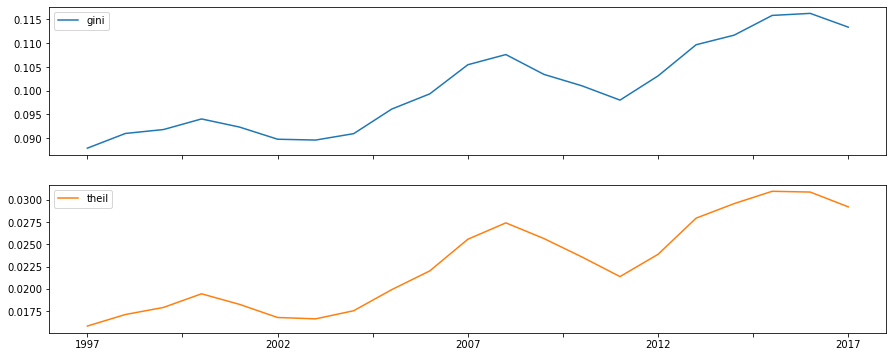

In [50]:
inequalities.plot(subplots=True, figsize=(15,6))